**作业内容：**
**<br>KNN解决房价预测的回归问题**
**<br>K折交叉验证寻找最优的K**


In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 

In [181]:
# 加载数据集
name_data=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv('housingPrice/housing.data.txt', sep='\s+',names=name_data)
#特征指标
x_data=df.iloc[:,0:13]
#目标预测值
y_data=df.iloc[:,-1]



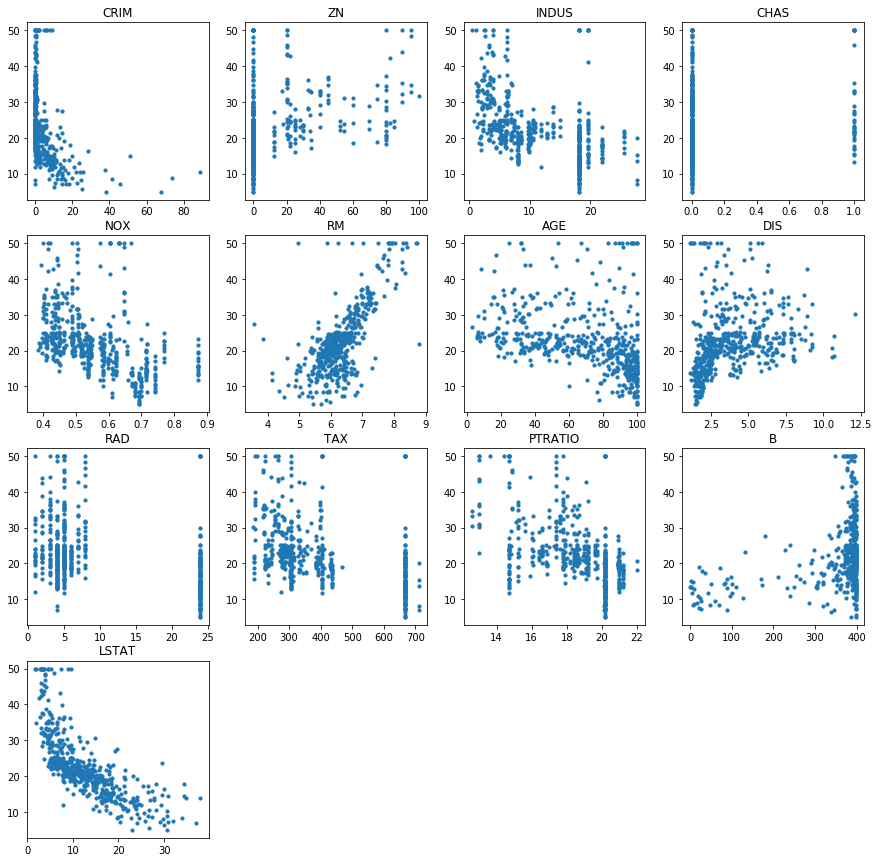

In [182]:
# 画出每个特征值与目标值之间的散点图
plt.figure(figsize=(15, 15))
for i in range(13):
    plt.subplot(4,4,1+i)
    plt.scatter(df.iloc[:,i],y_data,s = 10)
    plt.title(name_data[i])  
plt.show()

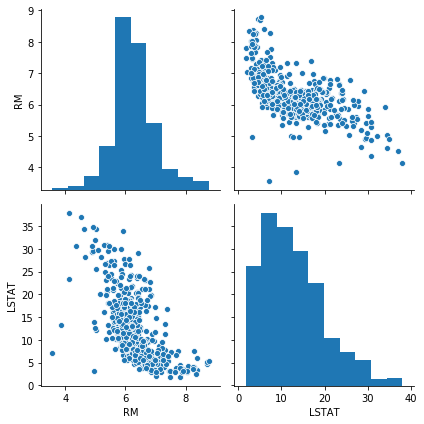

In [183]:
# 由上面的散点图可以看出['RM','LSTAT'] 与目标值的关联性强度较高，对此利用Seaborn作图做进一步的验证
cols = ['RM', 'LSTAT']
# 构造特征之间的联系即构造散点图矩阵
sns.pairplot(data[cols], height=3)
plt.tight_layout()
plt.show()


In [184]:
# 有图像可知，['RM','LSTAT'] 与目标值的确有较高的关联性，故而特征选择['RM','LSTAT'] 
x_data=df.loc[:,['RM','LSTAT']]

# 归一化
standardScaler = StandardScaler() 
standardScaler.fit(x_data) 
x_data=pd.DataFrame(standardScaler.transform(x_data) )



In [185]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    random_state=1,test_size=0.2)
# 寻找最优KNN的K值
knn_n=[1,3,5,7,9,11]
# 保存最好的k值
best_k=knn_n[0]  
best_score=0
kf = KFold(n_splits=5,shuffle=True,random_state=0)
for k in knn_n:
    curr_score=0
    #每一折的训练以及计算准确率
    for train_index,valid_index in kf.split(x_train):
        clf=KNeighborsRegressor(n_neighbors=k,weights='uniform')
        #拟合数据
        clf.fit(x_train.iloc[train_index],y_train.iloc[train_index])
        # 使用测试数据验证模型
        curr_score=curr_score+clf.score(x_train.iloc[valid_index],y_train.iloc[valid_index])
    
    avg_score=curr_score/5
    if avg_score>best_score:
        best_score=avg_score
        best_k=k

print("最优k值:",best_k)
print("最优分值:",best_score)



最优k值: 11
最优分值: 0.7340596621538381


In [186]:
# 构建模型
clf=KNeighborsRegressor(n_neighbors=best_k,weights='uniform')
# 拟合数据
clf.fit(x_train,y_train)
# 获得验证集的预测值
y_predict=clf.predict(x_test)
# 获得准确率
score=clf.score(x_test,y_test)
print(score)


0.8407764458997432
